In [1]:
pip install pycocotools

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.14.1 which is incompatible.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


loading annotations into memory...
Done (t=2.18s)
creating index...
index created!


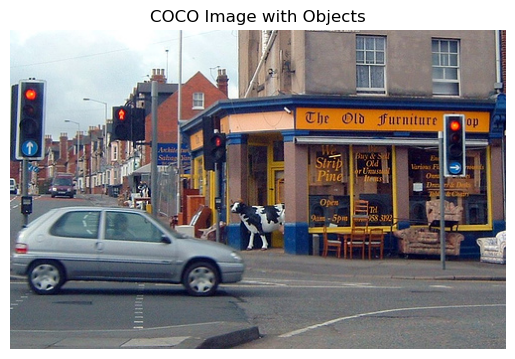

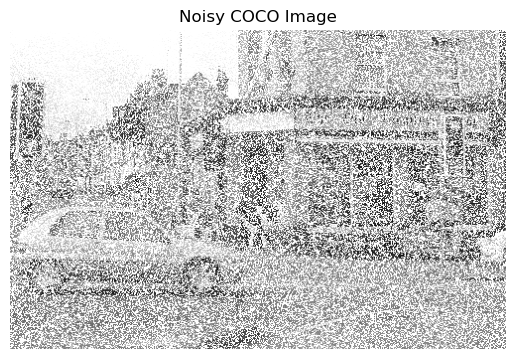

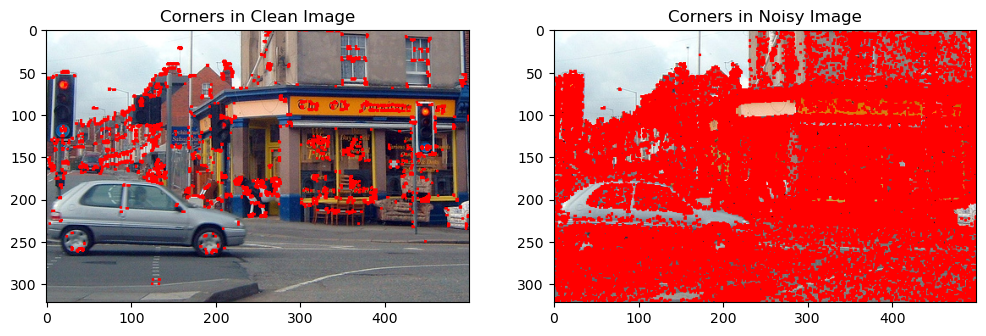

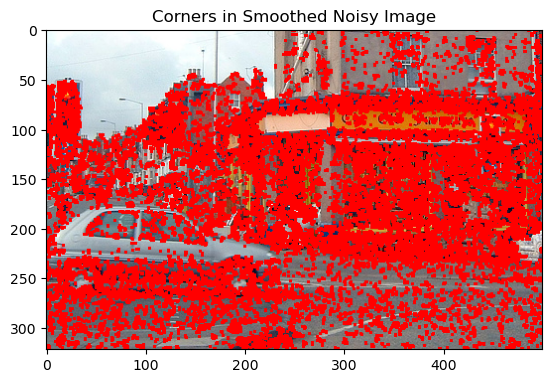

In [3]:
from pycocotools.coco import COCO
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

coco = COCO('annotations/instances_val2017.json') 

cat_ids = coco.getCatIds(catNms=['car', 'person', 'furniture'])
img_ids = coco.getImgIds(catIds=cat_ids)
img_data = coco.loadImgs(img_ids[8])[0]

# Load the image
img_url = img_data['coco_url']
img_resp = requests.get(img_url)
img_array = np.asarray(bytearray(img_resp.content), dtype=np.uint8)
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('COCO Image with Objects')
plt.axis('off')
plt.show()

# Generate Gaussian noise
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, gray_image.shape).astype(np.uint8)

# Add the noise to the grayscale image
noisy_image = cv2.add(gray_image, gaussian_noise)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy COCO Image")
plt.axis('off')
plt.show()

# Harris Corner Detection on clean image
corners_clean = cv2.cornerHarris(np.float32(gray_image), blockSize=2, ksize=3, k=0.04)

# Harris Corner Detection on noisy image
corners_noisy = cv2.cornerHarris(np.float32(noisy_image), blockSize=2, ksize=3, k=0.04)

# Dilate corner points to make them more visible
corners_clean_dilated = cv2.dilate(corners_clean, None)
corners_noisy_dilated = cv2.dilate(corners_noisy, None)

# Mark corners in red on clean image
image_with_corners_clean = image.copy()
image_with_corners_clean[corners_clean_dilated > 0.01 * corners_clean_dilated.max()] = [0, 0, 255]

# Mark corners in red on noisy image
image_with_corners_noisy = image.copy()
image_with_corners_noisy[corners_noisy_dilated > 0.01 * corners_noisy_dilated.max()] = [0, 0, 255]

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_with_corners_clean, cv2.COLOR_BGR2RGB))
plt.title("Corners in Clean Image")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners_noisy, cv2.COLOR_BGR2RGB))
plt.title("Corners in Noisy Image")
plt.show()

# Apply Gaussian smoothing to reduce noise
smoothed_noisy_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Harris Corner Detection on the smoothed noisy image
corners_smoothed = cv2.cornerHarris(np.float32(smoothed_noisy_image), blockSize=2, ksize=3, k=0.04)

# Dilate and mark corners on the smoothed image
corners_smoothed_dilated = cv2.dilate(corners_smoothed, None)
image_with_corners_smoothed = image.copy()
image_with_corners_smoothed[corners_smoothed_dilated > 0.01 * corners_smoothed_dilated.max()] = [0, 0, 255]

# Display result after smoothing
plt.imshow(cv2.cvtColor(image_with_corners_smoothed, cv2.COLOR_BGR2RGB))
plt.title("Corners in Smoothed Noisy Image")
plt.show()


loading annotations into memory...
Done (t=2.46s)
creating index...
index created!


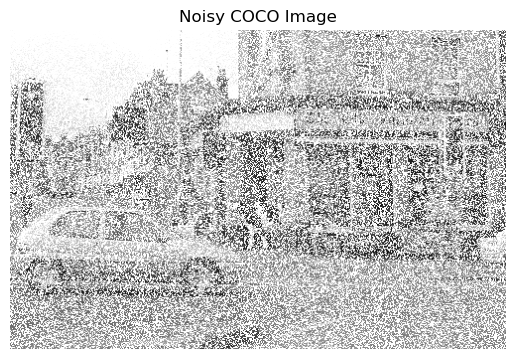

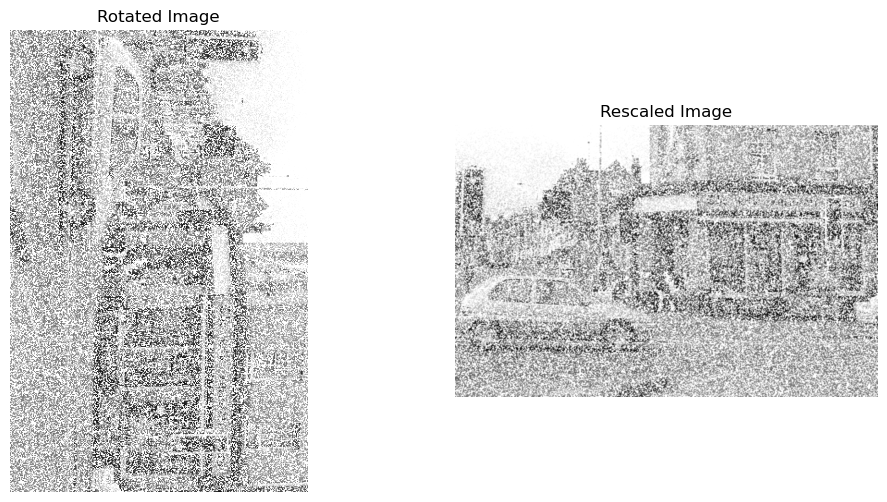

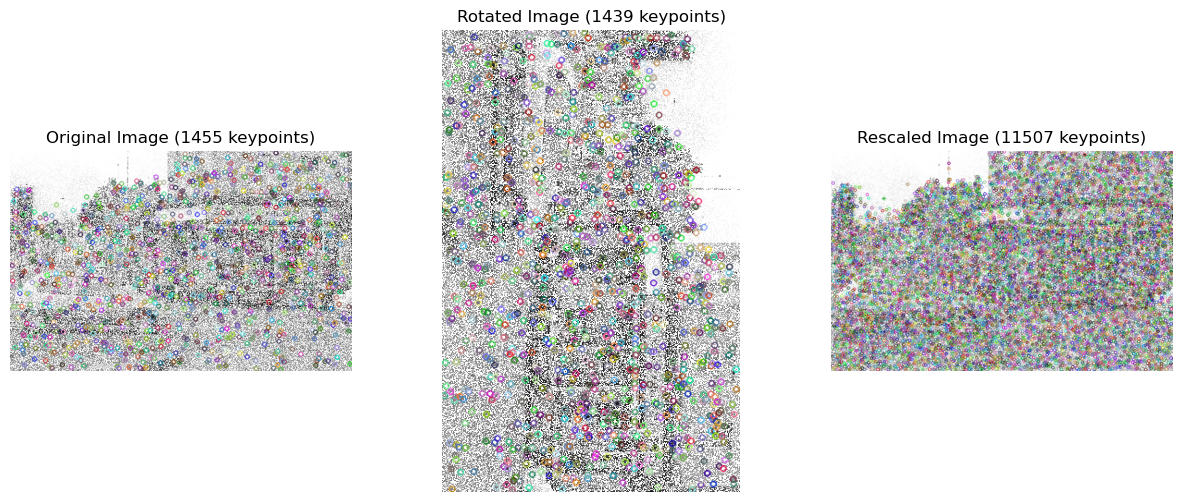

Number of consistent keypoints between original and rotated image: 1363
Number of consistent keypoints between original and rescaled image: 978


In [4]:
from pycocotools.coco import COCO
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

coco = COCO('annotations/instances_val2017.json') 

cat_ids = coco.getCatIds(catNms=['car', 'person', 'furniture'])
img_ids = coco.getImgIds(catIds=cat_ids)
img_data = coco.loadImgs(img_ids[8])[0]

# Load the image
img_url = img_data['coco_url']
img_resp = requests.get(img_url)
img_array = np.asarray(bytearray(img_resp.content), dtype=np.uint8)
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Generate Gaussian noise
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, gray_image.shape).astype(np.uint8)

# Add the noise to the grayscale image
noisy_image = cv2.add(gray_image, gaussian_noise)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy COCO Image")
plt.axis('off')
plt.show()

# Rotate the image by 90 degrees clockwise
rotated_image = cv2.rotate(noisy_image, cv2.ROTATE_90_CLOCKWISE)

# Rescale the image by 1.5x in both dimensions
scale_factor = 1.5
rescaled_image = cv2.resize(noisy_image, None, fx=scale_factor, fy=scale_factor)

# Display the rotated and rescaled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rescaled_image, cmap='gray')
plt.title("Rescaled Image")
plt.axis('off')
plt.show()

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT keypoints and descriptors from the original (noisy) image
keypoints_original, descriptors_original = sift.detectAndCompute(noisy_image, None)

# Extract SIFT keypoints and descriptors from the rotated image
keypoints_rotated, descriptors_rotated = sift.detectAndCompute(rotated_image, None)

# Extract SIFT keypoints and descriptors from the rescaled image
keypoints_rescaled, descriptors_rescaled = sift.detectAndCompute(rescaled_image, None)

# Draw the keypoints on the images
image_with_keypoints_original = cv2.drawKeypoints(noisy_image, keypoints_original, None)
image_with_keypoints_rotated = cv2.drawKeypoints(rotated_image, keypoints_rotated, None)
image_with_keypoints_rescaled = cv2.drawKeypoints(rescaled_image, keypoints_rescaled, None)

# Display the images with keypoints
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_with_keypoints_original, cmap='gray')
plt.title(f"Original Image ({len(keypoints_original)} keypoints)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_with_keypoints_rotated, cmap='gray')
plt.title(f"Rotated Image ({len(keypoints_rotated)} keypoints)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_with_keypoints_rescaled, cmap='gray')
plt.title(f"Rescaled Image ({len(keypoints_rescaled)} keypoints)")
plt.axis('off')

plt.show()

# Initialize FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors between original and rotated images
matches_rotated = flann.knnMatch(descriptors_original, descriptors_rotated, k=2)

# Match descriptors between original and rescaled images
matches_rescaled = flann.knnMatch(descriptors_original, descriptors_rescaled, k=2)

# Apply ratio test to keep only good matches
good_matches_rotated = []
for m, n in matches_rotated:
    if m.distance < 0.7 * n.distance:
        good_matches_rotated.append(m)

good_matches_rescaled = []
for m, n in matches_rescaled:
    if m.distance < 0.7 * n.distance:
        good_matches_rescaled.append(m)

# Display the number of consistent keypoints
print(f"Number of consistent keypoints between original and rotated image: {len(good_matches_rotated)}")
print(f"Number of consistent keypoints between original and rescaled image: {len(good_matches_rescaled)}")


loading annotations into memory...
Done (t=2.25s)
creating index...
index created!


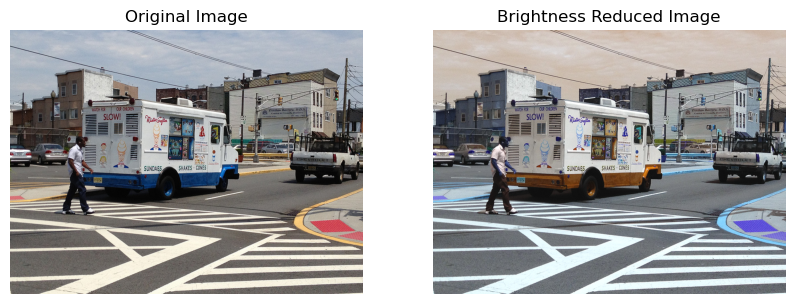

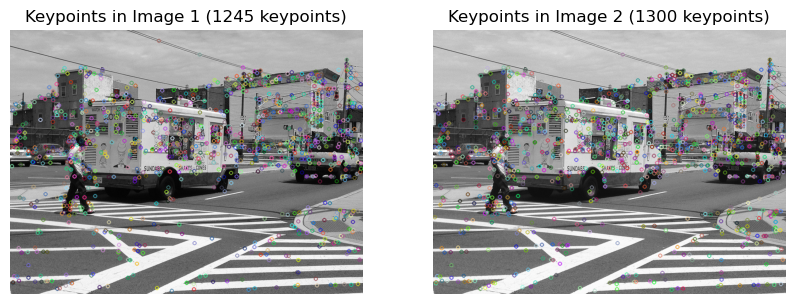

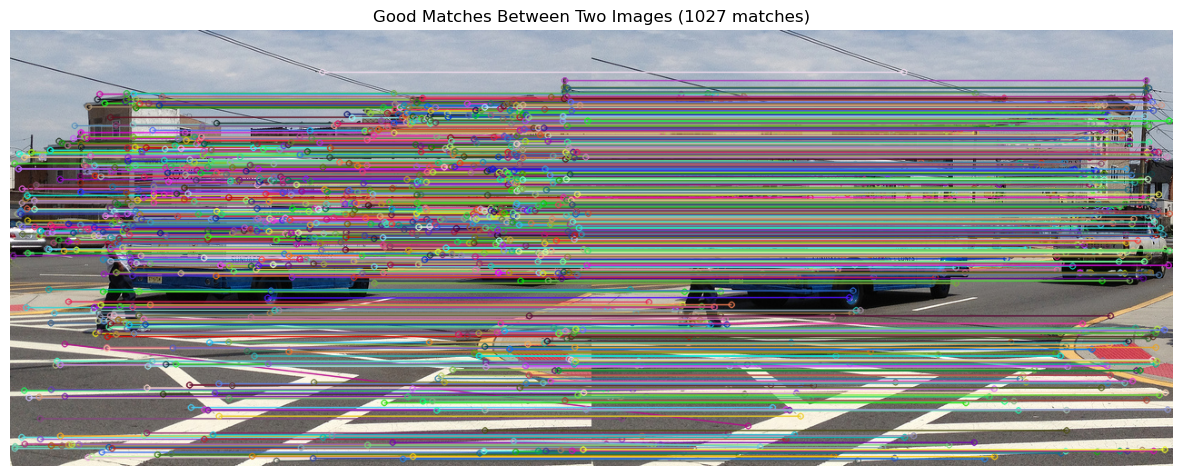

In [5]:
from pycocotools.coco import COCO
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

coco = COCO('annotations/instances_val2017.json')

cat_ids = coco.getCatIds(catNms=['car'])

# Get image IDs for the selected category
img_ids = coco.getImgIds(catIds=cat_ids)

img_info1 = coco.loadImgs(img_ids[4])[0]
img_info2 = coco.loadImgs(img_ids[4])[0]

# Fetch the images using their URLs
def load_image_from_url(url):
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    return cv2.imdecode(img_array, cv2.IMREAD_COLOR)

image1 = load_image_from_url(img_info1['coco_url'])
image2 = load_image_from_url(img_info2['coco_url'])

image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

brightness_value = 10
brighter_image = cv2.convertScaleAbs(image_rgb, beta=brightness_value)


# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(brighter_image, cv2.COLOR_BGR2GRAY)

# Display the two images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(brighter_image, cv2.COLOR_BGR2RGB))
plt.title("Brightness Reduced Image")
plt.axis('off')
plt.show()

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Draw keypoints on both images
image_with_keypoints1 = cv2.drawKeypoints(gray_image1, keypoints1, None)
image_with_keypoints2 = cv2.drawKeypoints(gray_image2, keypoints2, None)

# Display images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_with_keypoints1, cmap='gray')
plt.title(f"Keypoints in Image 1 ({len(keypoints1)} keypoints)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints2, cmap='gray')
plt.title(f"Keypoints in Image 2 ({len(keypoints2)} keypoints)")
plt.axis('off')
plt.show()

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Higher value for more precision

# Initialize FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw good matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title(f"Good Matches Between Two Images ({len(good_matches)} matches)")
plt.axis('off')
plt.show()



In [6]:
import cv2
import numpy as np
from pycocotools.coco import COCO
import requests
import matplotlib.pyplot as plt

# Load COCO annotations
coco = COCO('annotations/instances_val2017.json')

# Get category ID for 'car'
cat_ids = coco.getCatIds(catNms=['car'])
img_ids = coco.getImgIds(catIds=cat_ids)

# Load two images of the same object (car) from different perspectives
img_info1 = coco.loadImgs(img_ids[4])[0]
img_info2 = coco.loadImgs(img_ids[4])[0]

# Function to load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    return cv2.imdecode(img_array, cv2.IMREAD_COLOR)

image1 = load_image_from_url(img_info1['coco_url'])
image2 = load_image_from_url(img_info2['coco_url'])

image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

brightness_value = 10
brighter_image = cv2.convertScaleAbs(image_rgb, beta=brightness_value)

# Convert to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(brighter_image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Initialize FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors between the two images
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Extract matched descriptors from both images
matched_descriptors1 = np.array([descriptors1[m.queryIdx] for m in good_matches])
matched_descriptors2 = np.array([descriptors2[m.trainIdx] for m in good_matches])

print(f"Number of good matches: {len(good_matches)}")

# Compute statistical properties for Image 1
mean1 = np.mean(matched_descriptors1, axis=0)
variance1 = np.var(matched_descriptors1, axis=0)
min1 = np.min(matched_descriptors1, axis=0)
max1 = np.max(matched_descriptors1, axis=0)

# Compute statistical properties for Image 2
mean2 = np.mean(matched_descriptors2, axis=0)
variance2 = np.var(matched_descriptors2, axis=0)
min2 = np.min(matched_descriptors2, axis=0)
max2 = np.max(matched_descriptors2, axis=0)

# Aggregate statistical properties into a global feature vector for Image 1
global_feature_vector1 = np.concatenate([mean1, variance1, min1, max1])

# Aggregate statistical properties into a global feature vector for Image 2
global_feature_vector2 = np.concatenate([mean2, variance2, min2, max2])

print(f"Global feature vector for Image 1 (size: {global_feature_vector1.shape}):")
print(global_feature_vector1)

print(f"Global feature vector for Image 2 (size: {global_feature_vector2.shape}):")
print(global_feature_vector2)


loading annotations into memory...
Done (t=2.01s)
creating index...
index created!
Number of good matches: 1028
Global feature vector for Image 1 (size: (512,)):
[  26.103113    19.027237    21.418287    18.473736    29.082685
   13.223736    11.689689    11.596304    65.19844     29.920233
   22.043774    18.270428    28.047665    13.789884    13.487354
   20.930933    73.28794     23.590467    16.603113    14.524319
   22.479572    14.412452    17.937744    28.11284     30.504864
   12.774319    13.16537     11.873541    27.902723    15.756809
   17.00681     17.5107      33.75292     21.03891     22.599222
   24.513618    38.339493    18.17996     12.951362    12.939689
   94.17607     34.442608    23.512646    26.089495    37.440662
   18.58074     13.652723    28.942608   100.96011     33.90078
   17.599222    19.655642    31.317122    20.322958    19.990273
   31.948444    40.601166    15.881323    14.142996    16.909533
   34.699417    18.494164    19.449417    19.180933    32.7

In [7]:
pip install --upgrade --force-reinstall numpy scikit-learn

  Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting unins

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.1.1 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.1 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.1 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.1.1 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.1.1 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.14.1 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.1 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.1 which is incompatible.
transformers 4.42.3 requires numpy<2.

In [8]:
import cv2
import numpy as np
from pycocotools.coco import COCO
import requests

# Load COCO annotations
coco = COCO('annotations/instances_val2017.json')

categories = ['car', 'person', 'dog']
cat_ids = coco.getCatIds(catNms=categories)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    return cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Function to extract global feature vector (mean, variance, min, max) from an image
def extract_global_feature_vector(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    if descriptors is None:  # Handle cases with no descriptors
        return np.zeros(128 * 4)
    
    mean = np.mean(descriptors, axis=0)
    variance = np.var(descriptors, axis=0)
    min_val = np.min(descriptors, axis=0)
    max_val = np.max(descriptors, axis=0)
    return np.concatenate([mean, variance, min_val, max_val])

# Prepare the dataset
X = []  # Feature vectors
y = []  # Labels

# Loop through each category and get images
for category in categories:
    category_id = coco.getCatIds(catNms=[category])[0]
    img_ids = coco.getImgIds(catIds=[category_id])
    
    for img_id in img_ids[:25]:
        img_info = coco.loadImgs(img_id)[0]
        image = load_image_from_url(img_info['coco_url'])
        
        # Extract the global feature vector
        global_feature_vector = extract_global_feature_vector(image)
        
        # Add the feature vector and label to the dataset
        X.append(global_feature_vector)
        y.append(category)  # Label corresponds to the object category

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

loading annotations into memory...
Done (t=2.34s)
creating index...
index created!


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize the kNN classifier (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 34.78%


kNN Classification Accuracy: 34.78%
Logistic Regression Accuracy: 30.43%


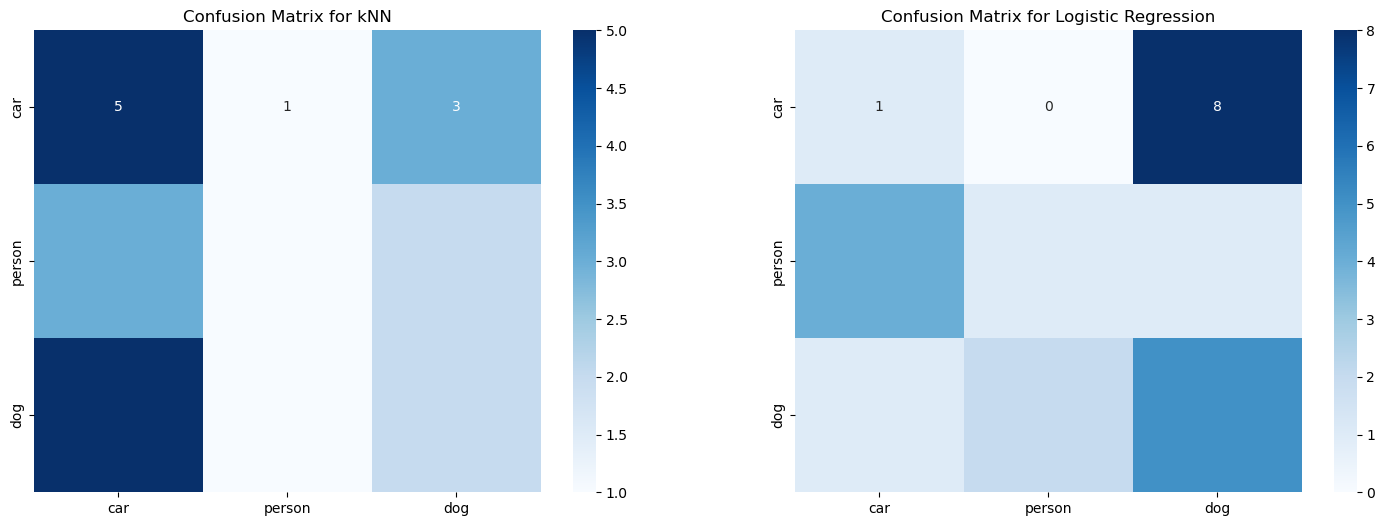

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train Logistic Regression on the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Accuracy of kNN (calculated earlier)
print(f"kNN Classification Accuracy: {accuracy * 100:.2f}%")

# Compare with Logistic Regression and SVM
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")


# Confusion matrix for kNN
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix for kNN')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix for Logistic Regression')

plt.show()